In [1]:
# pip install -U scikit-learn

Run `sudo apt-get install graphviz` on the appropriate kernel

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data prep

In [3]:
np.random.seed(0)

In [4]:
DATA_SIZE = int(1e6)
ERROR_SIZE = 100
# ERROR_SIZE = 20

In [5]:
df = pd.DataFrame()

In [6]:
df['A'] = np.random.choice(np.linspace(0, 1, 5), size=DATA_SIZE)

In [7]:
df['B'] = np.random.choice(np.linspace(0, 1, 10), size=DATA_SIZE)

In [8]:
df['C'] = np.random.choice(np.linspace(0, 1, 200), size=DATA_SIZE)

In [9]:
df['C_binned'] = pd.cut(df.C, bins=5).apply(lambda x: x.left)

In [10]:
df['target'] = (
    50 * np.sqrt(df.A) + 
    200 * df.B * df.A + 
    1 * df.C +
    np.random.normal(loc=0, scale=ERROR_SIZE, size=DATA_SIZE)
)

In [11]:
pdf = df.sample(300)

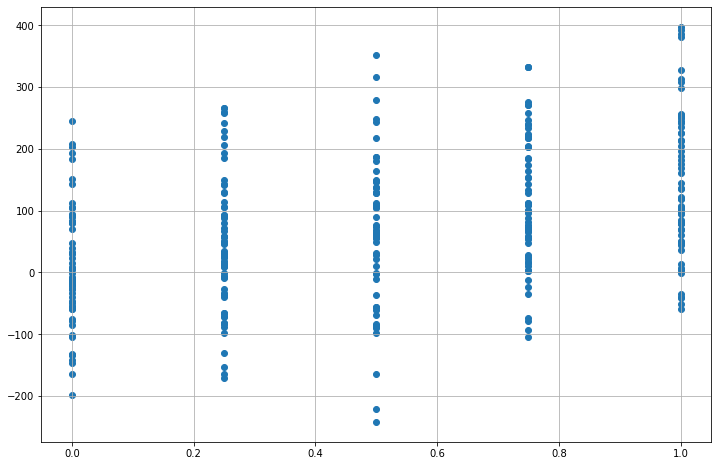

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pdf.A, pdf.target)
ax.grid()

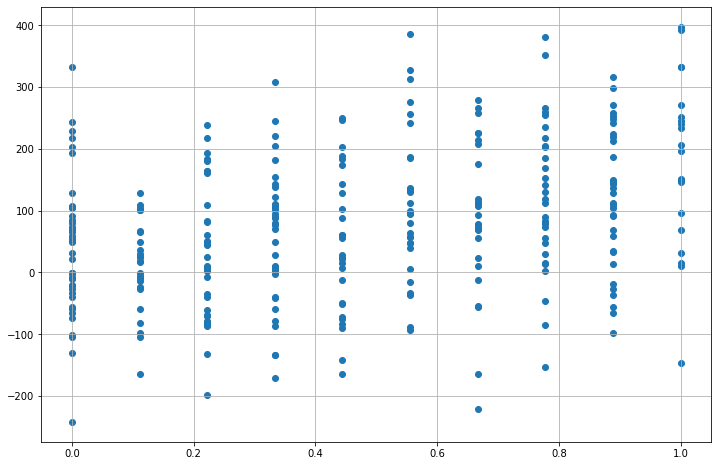

In [13]:
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pdf.B, pdf.target)
ax.grid()

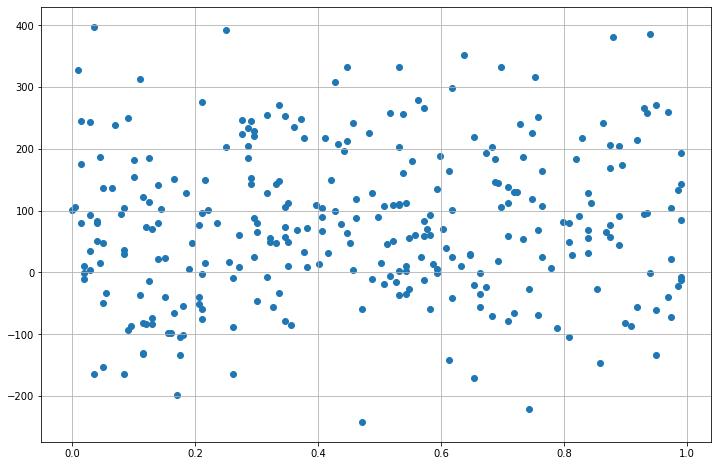

In [14]:
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pdf.C, pdf.target)
ax.grid()

Text(0.5, 0, 'target')

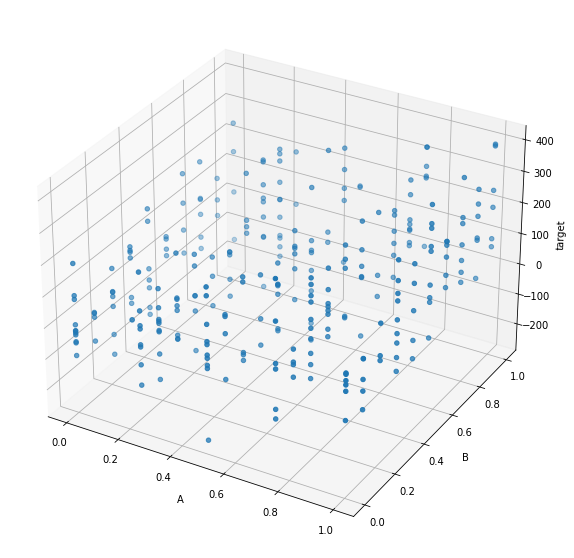

In [15]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pdf.A, pdf.B, pdf.target)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('target')

In [16]:
TRAIN_SIZE = 10000
TEST_SIZE = 10000

train_df = df.sample(TRAIN_SIZE)
test_df = df.loc[~df.index.isin(train_df.index), :].sample(TEST_SIZE)

# Regression Tree

In [17]:
from sklearn import tree
from sklearn.metrics import r2_score

In [18]:
features = [
    'A',
    'B',
#     'C_binned'
]

In [19]:
reg = tree.DecisionTreeRegressor(
#     max_depth=3
    min_samples_leaf=1000
)
reg.fit(train_df[features], train_df.target)

DecisionTreeRegressor(min_samples_leaf=1000)

In [20]:
r2_score(test_df.target, reg.predict(test_df[features]))

0.2579681136907135

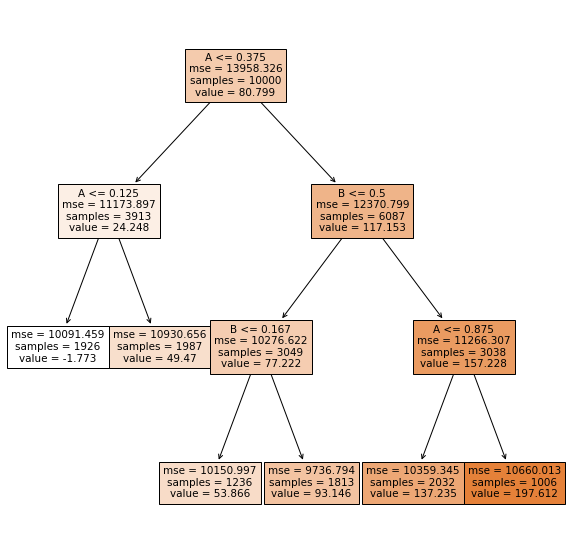

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(reg, feature_names=features, filled=True, ax=ax);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


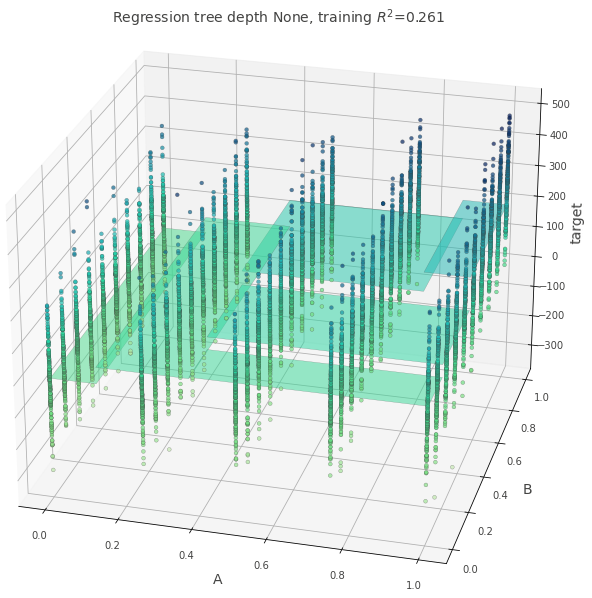

In [22]:
from dtreeviz.trees import *

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(reg,
                      train_df[['A', 'B']], train_df.target,
                      feature_names=['A', 'B'],
                      target_name="target",
                      fontsize=14,
                      elev=25,
                      azim=-75,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()

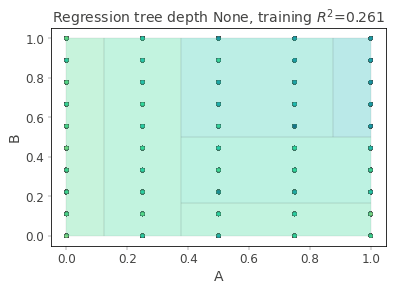

In [23]:
t = rtreeviz_bivar_heatmap(reg,
                           train_df[['A', 'B']], train_df.target,
                           feature_names=['A', 'B'],
                           fontsize=14, 
                           )

plt.show()

In [24]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(reg, train_df[['A', 'B']], train_df.target,
                target_name="target",
                feature_names=['A', 'B']
              )
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [25]:
r2_score(test_df.target, reg.predict(test_df[['A', 'B']]))

0.2579681136907135

Text(0, 0.5, 'Mean relative decrease in MSE')

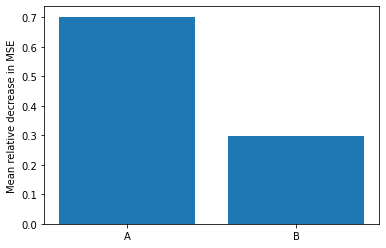

In [26]:
ax = plt.bar(['A', 'B'], reg.feature_importances_)
ax = plt.gca()
ax.set_ylabel('Mean relative decrease in MSE')

## Feature importance 

Importance of feature A = Mean decrease in criterion (MSE) for all splits on A

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Two features

In [28]:
features = ['A', 'B']

In [29]:
rf = RandomForestRegressor(
    oob_score=True,
    verbose=True, 
    n_jobs=-1)

In [30]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(n_jobs=-1, oob_score=True, verbose=True)

<BarContainer object of 2 artists>

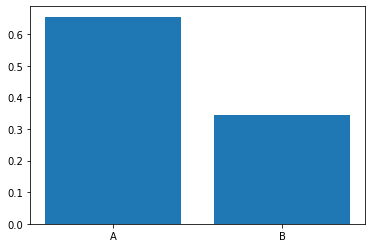

In [31]:
plt.bar(features, rf.feature_importances_)

In [32]:
rf.oob_score_

0.28734926707712627

In [33]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.29142994881754225

In [34]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.29437297965698717

In [35]:
depths = [tree.get_depth() for tree in rf.estimators_]

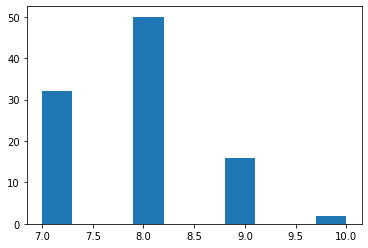

In [36]:
plt.hist(depths);

## Adding a "high cardinality" feature

In [37]:
features = ['A', 'B', 'C']

In [38]:
rf = RandomForestRegressor(
    oob_score=True,
    verbose=True, 
    n_jobs=-1)

In [39]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestRegressor(n_jobs=-1, oob_score=True, verbose=True)

<BarContainer object of 3 artists>

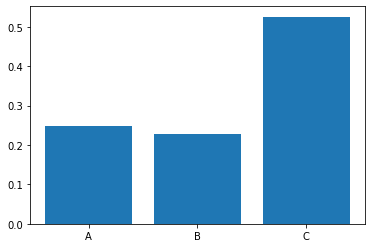

In [40]:
plt.bar(features, rf.feature_importances_)

In [41]:
rf.oob_score_

0.02088789087884102

In [42]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.03122238045454362

In [43]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.6868790914618453

In [44]:
depths = [tree.get_depth() for tree in rf.estimators_]

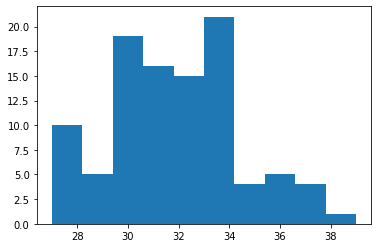

In [45]:
plt.hist(depths);

## Tuning 

In [46]:
features = ['A', 'B', 'C']

In [47]:
rf = RandomForestRegressor(
    oob_score=True,
    verbose=True, 
    n_jobs=-1, 
    max_depth=7
)

In [48]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestRegressor(max_depth=7, n_jobs=-1, oob_score=True, verbose=True)

<BarContainer object of 3 artists>

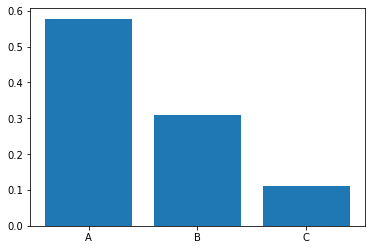

In [49]:
plt.bar(features, rf.feature_importances_)

In [50]:
rf.oob_score_

0.2786090657935463

In [51]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.284615771135983

In [52]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.3305011351449606

In [53]:
depths = [tree.get_depth() for tree in rf.estimators_]

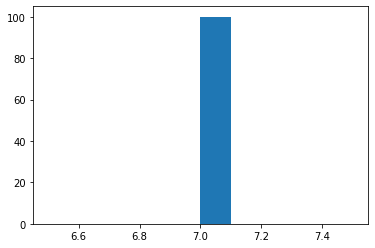

In [54]:
plt.hist(depths);

## Feature engineering

In [55]:
features = ['A', 'B', 'C_binned']

In [56]:
rf = RandomForestRegressor(
    oob_score=True,
    verbose=True, 
    n_jobs=-1, 
#     max_depth=7
)

In [57]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestRegressor(n_jobs=-1, oob_score=True, verbose=True)

<BarContainer object of 3 artists>

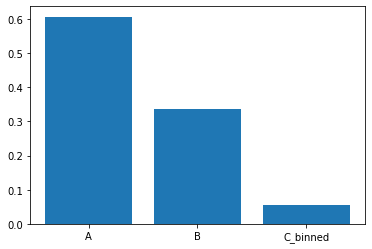

In [58]:
plt.bar(features, rf.feature_importances_)

In [59]:
rf.oob_score_

0.2708584003462289

In [60]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.2763896600989836

In [61]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.3071451613484426

In [62]:
depths = [tree.get_depth() for tree in rf.estimators_]

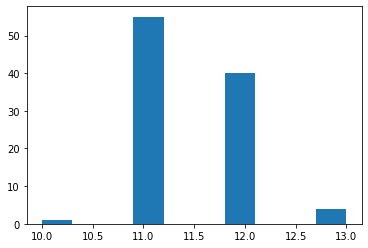

In [63]:
plt.hist(depths);

##  More train data

In [64]:
TRAIN_SIZE = 300000
TEST_SIZE = 10000

train_df = df.sample(TRAIN_SIZE)
test_df = df.loc[~df.index.isin(train_df.index), :].sample(TEST_SIZE)

In [65]:
features = ['A', 'B', 'C']

In [66]:
rf = RandomForestRegressor(
    oob_score=True,
    verbose=True, 
    n_jobs=-1, 
#     max_depth=7
)

In [67]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


RandomForestRegressor(n_jobs=-1, oob_score=True, verbose=True)

<BarContainer object of 3 artists>

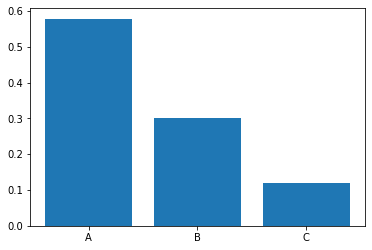

In [68]:
plt.bar(features, rf.feature_importances_)

In [69]:
rf.oob_score_

0.27357183743446345

In [70]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


0.28206477236251104

In [71]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished


0.3217048613873057

In [72]:
depths = [tree.get_depth() for tree in rf.estimators_]

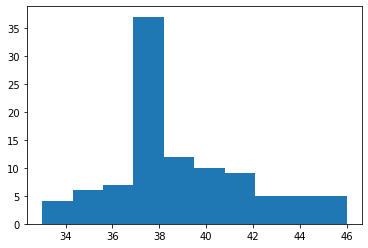

In [73]:
plt.hist(depths);

#### Notes 

The particalar problem setup in this notebook gains little through the addition of more estimators and the introduction of randomization.  This means we are actaully in the "evaluating individual trees" regime.  This allows us to highlight the problems that may arise when using trees (which are not resolved by adding more trees).

The efficacy of a decison tree, and RF by extension, depends on the relationship between:
- the relative level of noise on the signal
- the number of candidate split points in the data
- the number of available train records (the local density of observations)

# ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

## Two features

In [60]:
features = ['A', 'B']

In [61]:
rf = ExtraTreesRegressor(
#     oob_score=True,
    verbose=True, 
    n_jobs=-1)

In [62]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


ExtraTreesRegressor(n_jobs=-1, verbose=True)

<BarContainer object of 2 artists>

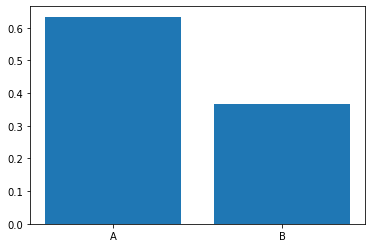

In [63]:
plt.bar(features, rf.feature_importances_)

In [64]:
# rf.oob_score_

In [65]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.09409867814940076

In [66]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.09434901226190318

In [67]:
depths = [tree.get_depth() for tree in rf.estimators_]

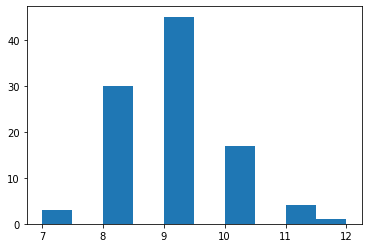

In [68]:
plt.hist(depths);

## Adding a "high cardinality" feature

In [69]:
features = ['A', 'B', 'C']

In [70]:
rf = ExtraTreesRegressor(
#     oob_score=True,
    verbose=True, 
    n_jobs=-1)

In [71]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


ExtraTreesRegressor(n_jobs=-1, verbose=True)

<BarContainer object of 3 artists>

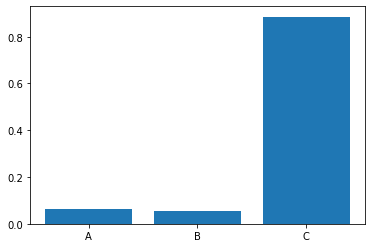

In [72]:
plt.bar(features, rf.feature_importances_)

In [73]:
# rf.oob_score_

In [74]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


-0.4649726158772025

In [75]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


0.998835191240187

In [76]:
depths = [tree.get_depth() for tree in rf.estimators_]

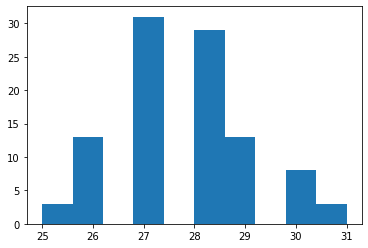

In [77]:
plt.hist(depths);

## Tuning 

In [78]:
features = ['A', 'B', 'C']

In [79]:
rf = ExtraTreesRegressor(
#     oob_score=True,
    verbose=True, 
    n_jobs=-1, 
    max_depth=7
)

In [80]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


ExtraTreesRegressor(max_depth=7, n_jobs=-1, verbose=True)

<BarContainer object of 3 artists>

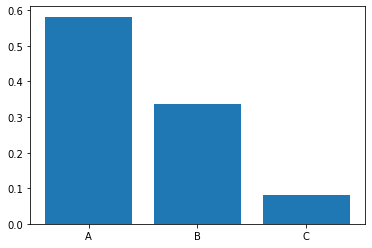

In [81]:
plt.bar(features, rf.feature_importances_)

In [82]:
# rf.oob_score_

In [83]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.09475526729842942

In [84]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.11178424265083098

In [85]:
depths = [tree.get_depth() for tree in rf.estimators_]

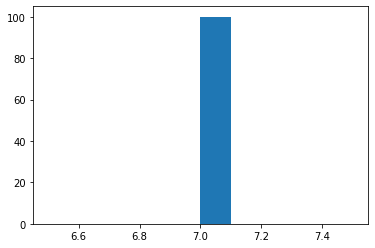

In [86]:
plt.hist(depths);

## Feature engineering

In [87]:
features = ['A', 'B', 'C_binned']

In [88]:
rf = ExtraTreesRegressor(
#     oob_score=True,
    verbose=True, 
    n_jobs=-1, 
#     max_depth=7
)

In [89]:
rf.fit(train_df[features], train_df.target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


ExtraTreesRegressor(n_jobs=-1, verbose=True)

<BarContainer object of 3 artists>

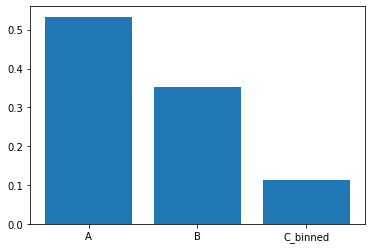

In [90]:
plt.bar(features, rf.feature_importances_)

In [91]:
# rf.oob_score_

In [92]:
# should match the oob score somewhat
r2_score(test_df.target, rf.predict(test_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.08029059476497713

In [93]:
# train_score
r2_score(train_df.target, rf.predict(train_df[features]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.11277262000589694

In [94]:
depths = [tree.get_depth() for tree in rf.estimators_]

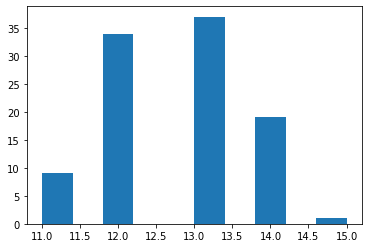

In [95]:
plt.hist(depths);

# Bias & variance

In [63]:
DATA_SIZE = 5000

In [64]:
df = pd.DataFrame()

In [65]:
df['A'] = np.random.choice(np.linspace(0, 2*np.pi, 50), size=DATA_SIZE)

In [66]:
df['target'] = np.sin(df.A) + np.random.normal(loc=0, scale=0.5, size=DATA_SIZE)

In [67]:
TRAIN_SIZE = 150
TEST_SIZE = 40

train_df = df.sample(TRAIN_SIZE)
test_df = df.loc[~df.index.isin(train_df.index), :].sample(TEST_SIZE)

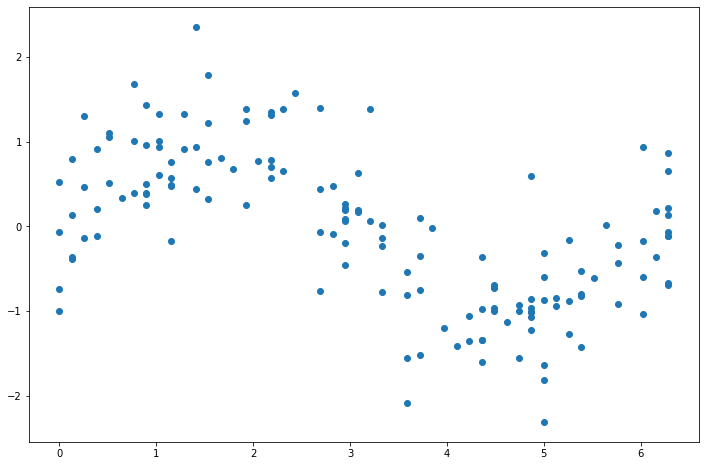

In [68]:
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(train_df.A, train_df.target)

In [69]:
from sklearn import tree

In [70]:
reg_1 = tree.DecisionTreeRegressor(max_depth=2)
reg_1.fit(train_df[['A']], train_df.target)

DecisionTreeRegressor(max_depth=2)

In [71]:
reg_2 = tree.DecisionTreeRegressor(max_depth=5)
reg_2.fit(train_df[['A']], train_df.target)

DecisionTreeRegressor(max_depth=5)

In [72]:
reg_3 = tree.DecisionTreeRegressor()
reg_3.fit(train_df[['A']], train_df.target)

DecisionTreeRegressor()

In [73]:
test_points = np.linspace(0, 2*np.pi, 50).reshape(-1, 1)

predictions_1 = reg_1.predict(test_points)
predictions_2 = reg_2.predict(test_points)
predictions_3 = reg_3.predict(test_points)

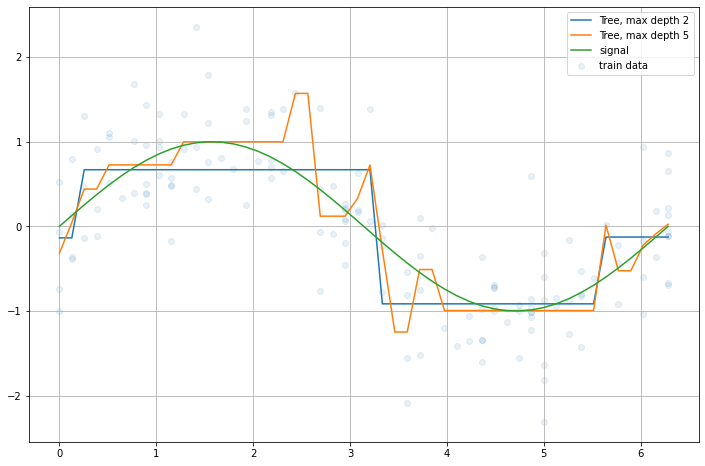

In [74]:
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(train_df.A, train_df.target, label='train data', alpha=0.1)
ax.plot(test_points, predictions_1, label='Tree, max depth 2')
ax.plot(test_points, predictions_2, label='Tree, max depth 5')
# ax.plot(test_points, predictions_3, label='Tree, max depth None')
ax.plot(test_points, np.sin(test_points), label='signal')
ax.grid()
ax.legend()

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
reg_1 = RandomForestRegressor(max_depth=2)
reg_1.fit(train_df[['A']], train_df.target)

RandomForestRegressor(max_depth=2)

In [77]:
reg_2 = RandomForestRegressor(max_depth=5)
reg_2.fit(train_df[['A']], train_df.target)

RandomForestRegressor(max_depth=5)

In [78]:
reg_3 = RandomForestRegressor()
reg_3.fit(train_df[['A']], train_df.target)

RandomForestRegressor()

In [79]:
test_points = np.linspace(0, 2*np.pi, 50).reshape(-1, 1)

predictions_1 = reg_1.predict(test_points)
predictions_2 = reg_2.predict(test_points)
predictions_3 = reg_3.predict(test_points)

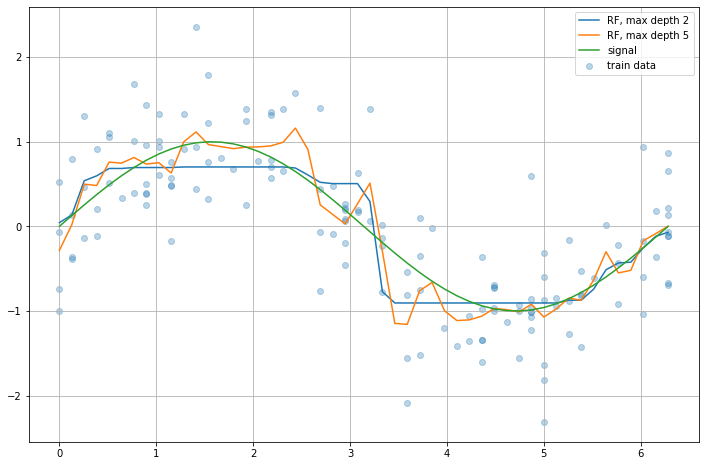

In [80]:
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(train_df.A, train_df.target, label='train data', alpha=0.3)
ax.plot(test_points, predictions_1, label='RF, max depth 2')
ax.plot(test_points, predictions_2, label='RF, max depth 5')
# ax.plot(test_points, predictions_3, label='RF, max depth None')
ax.plot(test_points, np.sin(test_points), label='signal')
ax.grid()
ax.legend()